In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
df_2008 = pd.read_excel('/Users/rohitanand/OneDrive - Jacobs University/Statistics/Udacity/data/all_alpha_08.xls')
#df_2008.head()

In [191]:
# Creating index, if required
# df_2008.reset_index(inplace=True)
# df_2008.set_index('index')

# Alternative
# df_2008.index = np.arange(0, len(df_2008))
# df_2008.index.name = 'Index'

In [175]:
# To view size of the file, features in the dataset and their datatypes
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.2+ KB


#### Dropping the unnecessary columns

In [3]:
df_2008.drop(labels=['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],axis=1,inplace=True)

#### Rename Sales Area to CERT Region for a better understanding

In [4]:
df_2008.rename(columns={'Sales Area':'Cert Region'},inplace=True)

#### Data Value Space

In [6]:
sorted(df_2008['Displ'].value_counts().index)

[1.3,
 1.5,
 1.6,
 1.8,
 2.0,
 2.2,
 2.3,
 2.4,
 2.5,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 5.0,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.9,
 6.0,
 6.1,
 6.2,
 6.5,
 6.7,
 6.8,
 7.0,
 8.0,
 8.4]

In [7]:
sorted(df_2008['Cyl'].value_counts().index)

['(10 cyl)',
 '(12 cyl)',
 '(16 cyl)',
 '(2 cyl)',
 '(4 cyl)',
 '(5 cyl)',
 '(6 cyl)',
 '(8 cyl)']

In [ ]:
# Processing done at a later stage to spearate these values
sorted(df_2008['Air Pollution Score'].value_counts().index)

In [7]:
# Processing done at a later stage to spearate these values
sorted(df_2008['City MPG'].value_counts().index)

['10',
 '10/13',
 '10/14',
 '11',
 '11/14',
 '11/15',
 '11/17',
 '12',
 '12/16',
 '13',
 '13/18',
 '13/19',
 '14',
 '14/18',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '33',
 '34',
 '35',
 '40',
 '48',
 '8',
 '9',
 '9/12',
 '9/13',
 '9/14']

In [8]:
# Processing done at a later stage to spearate these values
sorted(df_2008['Hwy MPG'].value_counts().index)

['12/16',
 '12/17',
 '12/18',
 '12/19',
 '13',
 '13/17',
 '13/18',
 '13/19',
 '14',
 '14/19',
 '15',
 '15/20',
 '16',
 '16/23',
 '17',
 '17/23',
 '17/24',
 '18',
 '19',
 '19/25',
 '19/26',
 '20',
 '20/27',
 '20/28',
 '21',
 '21/29',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '45']

In [9]:
# Processing done at a later stage to spearate these values
sorted(df_2008['Cmb MPG'].value_counts().index)

['10',
 '10/14',
 '10/15',
 '11',
 '11/15',
 '12',
 '12/15',
 '12/16',
 '13',
 '13/17',
 '13/18',
 '13/19',
 '14',
 '14/19',
 '15',
 '15/21',
 '16',
 '16/21',
 '16/22',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '34',
 '42',
 '46']

In [10]:
# Processing done at a later stage to spearate these values
sorted(df_2008['Greenhouse Gas Score'].value_counts().index)

['0',
 '1',
 '10',
 '2',
 '3',
 '4',
 '4/2',
 '4/3',
 '5',
 '5/3',
 '6',
 '6/3',
 '6/4',
 '6/5',
 '7',
 '7/5',
 '7/6',
 '8',
 '8/6',
 '9']

In [184]:
# Convert categorical to numerical columns which we don't do here as we have sufficient features for analysis
# print(df_2008['trans'].value_counts())
# array_trans = df_2008['trans'].values
# encoder = LabelEncoder()
# array_trans = encoder.fit_transform(array_trans)

#### Renaming the columns for easier accessibility

In [8]:
# Replacing blank space by an underscore in the column names
df_2008.rename(columns=lambda x:x.strip().lower().replace(' ','_'),inplace=True)

In [9]:
df_2008.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

#### Rows with null values

In [10]:
df_2008.isna().sum()

model                     0
displ                     0
cyl                     199
trans                   199
drive                    93
fuel                      0
cert_region               0
veh_class                 0
air_pollution_score       0
city_mpg                199
hwy_mpg                 199
cmb_mpg                 199
greenhouse_gas_score    199
smartway                  0
dtype: int64

In [92]:
# View the rows with null vals
# df_2008[df_2008['cyl'].isna()==True]

In [11]:
# Dropping rows with null vals
# Although these null vals can be replaced by mean, median, mode or any other Machine Learning Techniques
df_2008.dropna(axis=0, inplace=True)

In [12]:
# Verify if any of columns in 2008 have null values: should print False
df_2008.isnull().sum().any()

False

#### Duplicate rows

In [13]:
# Total number of duplicate rows
sum(df_2008.duplicated())

63

In [14]:
# Duplicate rows dropped
df_2008.drop_duplicates(inplace=True)

In [202]:
# Extracting the numerical values from this column
df_2008['cyl'].value_counts()

(6 cyl)     836
(4 cyl)     582
(8 cyl)     516
(5 cyl)     113
(12 cyl)     60
(10 cyl)     29
(2 cyl)       4
(16 cyl)      2
Name: cyl, dtype: int64

In [15]:
df_2008['cyl'] = df_2008['cyl'].str.extract('(\d+)').astype(int)

In [204]:
df_2008['cyl'].value_counts()

6     836
4     582
8     516
5     113
12     60
10     29
2       4
16      2
Name: cyl, dtype: int64

In [16]:
# Filtering the hybrid vehicles 
hybrid_2008 = df_2008[df_2008['fuel'].str.contains('/')==True]

In [19]:
# 'fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score' 
# The above columns have properties of a hybrid vehicle which needs to be splitted
hybrid_2008.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,6/6,11/14,14/19,12/16,6/4,no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,van,6/6,9/12,12/16,10/14,4/2,no


In [17]:
# Copying temporary dataframes
copy_1_hybrid_2008 = hybrid_2008.copy()
copy_2_hybrid_2008 = hybrid_2008.copy()

In [208]:
# Example of splitting, the values will be extracted and new rows will be created for both ethanol and gas
hybrid_2008['fuel'].str.split('/')

316     [ethanol, gas]
317     [ethanol, gas]
321     [ethanol, gas]
322     [ethanol, gas]
380     [ethanol, gas]
             ...      
1734    [ethanol, gas]
1764    [ethanol, gas]
1765    [ethanol, gas]
1808    [ethanol, gas]
1809    [ethanol, gas]
Name: fuel, Length: 65, dtype: object

In [18]:
# Splitting for these columns
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for col in split_columns:
    copy_1_hybrid_2008[col] = copy_1_hybrid_2008[col].apply(lambda x:x.split('/')[0])
    copy_2_hybrid_2008[col] = copy_2_hybrid_2008[col].apply(lambda x:x.split('/')[1])

In [19]:
# Appeding the rows which were splitted
new_rows = copy_1_hybrid_2008.append(copy_2_hybrid_2008)

In [20]:
# Drop rows with ethanol/gas as fuel in the original table
df_2008.drop(hybrid_2008.index,inplace=True) 

In [21]:
# New dataframe
df_2008 = df_2008.append(new_rows,ignore_index=True)

In [22]:
df_2008.shape

(2207, 14)

In [23]:
# Covertig datatype 
for col in df_2008.columns:
    if '_mpg' in col:
        df_2008[col] = df_2008[col].astype(float)
        
df_2008['greenhouse_gas_score'] = df_2008['greenhouse_gas_score'].astype(float)
df_2008['air_pollution_score'] = df_2008['air_pollution_score'].astype(float)

In [24]:
# Mapping function from continuous to discrete space

def cont_to_disc(value):
    if value>=0 and value<=1:
        return 1
    elif value>=1 and value<=2:
        return 2
    elif value>=2 and value<=3:
        return 3
    elif value>=3 and value<=4:
        return 4
    elif value>=4 and value<=5:
        return 5
    elif value>=5 and value<=6:
        return 6
    elif value>=6 and value<=7:
        return 7

In [25]:
# Continuous space
df_2008['displ']

0       3.7
1       3.7
2       2.3
3       2.3
4       3.5
       ... 
2202    4.7
2203    5.6
2204    5.6
2205    5.6
2206    5.6
Name: displ, Length: 2207, dtype: float64

In [26]:
# Mapping function called 
df_2008['displ'] = df_2008['displ'].apply(cont_to_disc)

In [27]:
# Discrete space
df_2008['displ']

0       4.0
1       4.0
2       3.0
3       3.0
4       4.0
       ... 
2202    5.0
2203    6.0
2204    6.0
2205    6.0
2206    6.0
Name: displ, Length: 2207, dtype: float64

In [219]:
df_2008.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,4.0,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4.0,no
1,ACURA MDX,4.0,6,Auto-S5,4WD,Gasoline,FA,SUV,6.0,15.0,20.0,17.0,4.0,no
2,ACURA RDX,3.0,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5.0,no
3,ACURA RDX,3.0,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17.0,22.0,19.0,5.0,no
4,ACURA RL,4.0,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16.0,24.0,19.0,5.0,no


In [220]:
# df_2008.delete_index() , if the index was created before

# Correlation matrix for the numerical features
df_2008.corr()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
displ,1.000000,0.865737,-0.207904,-0.780898,-0.795137,-0.806073,-0.800388
cyl,0.865737,1.000000,-0.223736,-0.760487,-0.733034,-0.769103,-0.799904
air_pollution_score,-0.207904,-0.223736,1.000000,0.338598,0.320882,0.335429,0.281088
city_mpg,-0.780898,-0.760487,0.338598,1.000000,0.913783,0.982537,0.869994
hwy_mpg,-0.795137,-0.733034,0.320882,0.913783,1.000000,0.965451,0.874279
cmb_mpg,-0.806073,-0.769103,0.335429,0.982537,0.965451,1.000000,0.895627
greenhouse_gas_score,-0.800388,-0.799904,0.281088,0.869994,0.874279,0.895627,1.000000


In [28]:
# Check for null values
df_2008.isna().sum()

model                   0
displ                   6
cyl                     0
trans                   0
drive                   0
fuel                    0
cert_region             0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [29]:
# Drop rows with null vals
df_2008.dropna(axis=0,inplace=True)

<BarContainer object of 8 artists>

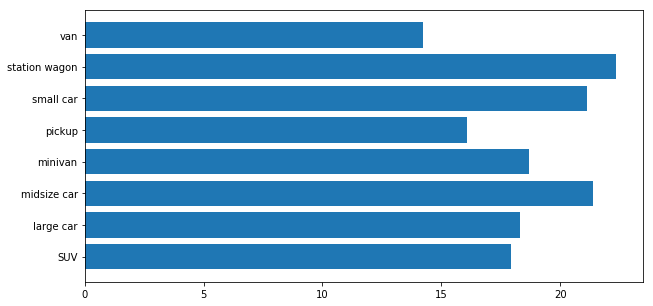

In [283]:
# Plotting the frequency of occurance of a particular vehicle class in dataset
fuel_eco_2008 = df_2008.groupby('veh_class').mean()['cmb_mpg']
plt.subplots(figsize=(10,5))
plt.barh(fuel_eco_2008.index,fuel_eco_2008, )

In [30]:
# List of numerical features
list = ['displ','cyl','air_pollution_score','city_mpg','hwy_mpg','cmb_mpg','greenhouse_gas_score']

In [31]:
# Create a new dataframe with these numerical features
new_df = df_2008.iloc[:,[df_2008.columns.get_loc(i) for i in list]]

In [32]:
# Describing the central tendency of the dataset
new_df.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.00000
mean,4.025443,6.141299,6.300772,16.942753,23.436620,19.287142,5.09632
std,1.311241,1.822717,1.037674,4.108350,4.954952,4.340116,1.86859
min,2.000000,2.000000,1.000000,8.000000,12.000000,10.000000,0.00000
25%,3.000000,4.000000,6.000000,14.000000,19.000000,16.000000,4.00000
50%,4.000000,6.000000,6.000000,17.000000,24.000000,19.000000,5.00000
75%,5.000000,8.000000,7.000000,19.000000,27.000000,22.000000,6.00000
max,7.000000,12.000000,9.500000,48.000000,45.000000,46.000000,10.00000


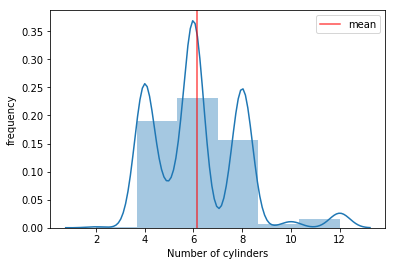

In [33]:
# Plotting the frequency of occurance of the values of number of cylinders in dataset
sns.distplot(df_2008['cyl'],bins=6)
plt.xlabel('Number of cylinders');
plt.ylabel('frequency');
plt.axvline(df_2008['cyl'].mean(),c='r',alpha=0.7,label='mean')
plt.legend(loc='best')
#df_2008['cyl'].kurtosis()

4.025442980463426

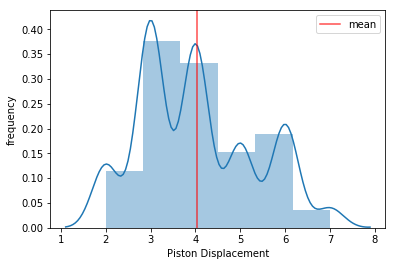

In [34]:
# Plotting the frequency of occurance of the values of piston displacement in dataset
sns.distplot(df_2008['displ'],bins=6)
plt.xlabel('Piston Displacement');
plt.ylabel('frequency');
plt.axvline(df_2008['displ'].mean(),c='r',alpha=0.7,label='mean')
plt.legend(loc='best')
df_2008['displ'].mean()

-0.06137940657839147

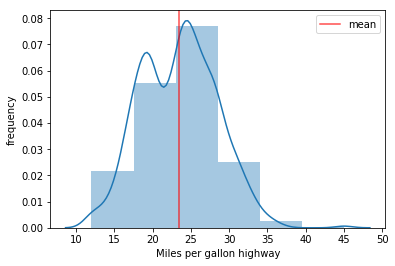

In [35]:
# Plotting the frequency of occurance of the values of highway mileage in mpg in dataset
sns.distplot(df_2008['hwy_mpg'],bins=6)
plt.xlabel('Miles per gallon highway');
plt.ylabel('frequency');
plt.axvline(df_2008['hwy_mpg'].mean(),c='r',alpha=0.7,label='mean')
plt.legend(loc='best')
df_2008['hwy_mpg'].kurtosis()

1.5183258354924174

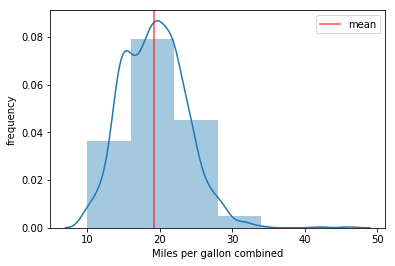

In [36]:
# Plotting the frequency of occurance of the values of highway + city mileage combined in mpg in dataset
sns.distplot(df_2008['cmb_mpg'],bins=6)
plt.xlabel('Miles per gallon combined');
plt.ylabel('frequency');
plt.axvline(df_2008['cmb_mpg'].mean(),c='r',alpha=0.7,label='mean')
plt.legend(loc='best')
df_2008['cmb_mpg'].kurtosis()

4.230522159657891

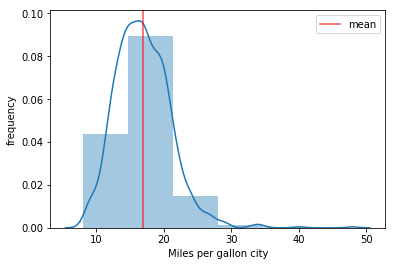

In [37]:
# Plotting the frequency of occurance of the values of city mileage in mpg in dataset
sns.distplot(df_2008['city_mpg'],bins=6)
plt.xlabel('Miles per gallon city');
plt.ylabel('frequency');
plt.axvline(df_2008['city_mpg'].mean(),c='r',alpha=0.7,label='mean')
plt.legend(loc='best')
df_2008['city_mpg'].kurtosis()

0.029322747907401858

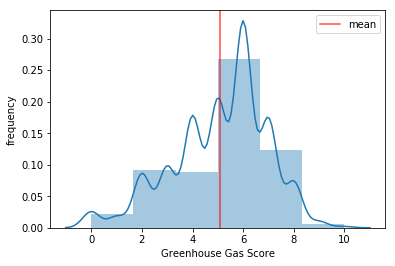

In [38]:
# Plotting the frequency of occurance of the values of Greenhouse Gas score in dataset
sns.distplot(df_2008['greenhouse_gas_score'],bins=6)
plt.xlabel('Greenhouse Gas Score');
plt.ylabel('frequency');
plt.axvline(df_2008['greenhouse_gas_score'].mean(),c='r',alpha=0.7,label='mean')
plt.legend(loc='best')
df_2008['greenhouse_gas_score'].kurtosis()

#### Outliers

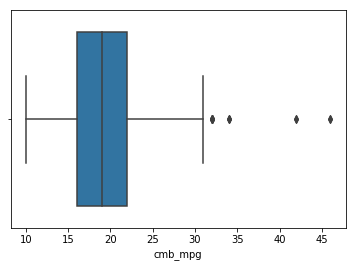

In [39]:
# Before outlier removal
sns.boxplot(new_df['cmb_mpg'])
#sns.swarmplot(new_df['greenhouse_gas_score'],new_df['displ'])

In [40]:
# Cosidering the observations 3 standard deviations away from the mean
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

In [41]:
# 89.9% of observations filtered which fall within 3 SD from the mean, rest is excluded
1 - np.mean(filtered_entries)

0.101317582916856

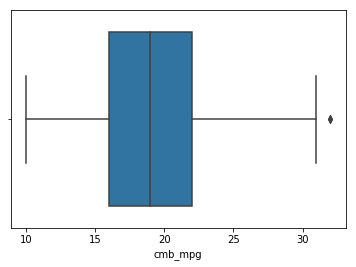

In [42]:
# After outlier removal
sns.boxplot(new_df['cmb_mpg'])
#sns.swarmplot(new_df['greenhouse_gas_score'],new_df['displ'])

In [45]:
# Converting the dataframe into an array
new_df_array = np.array(new_df)

In [46]:
# Scaling the values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_df_array = sc.fit_transform(new_df_array)

array([0.75017345, 0.89255173, 0.95179649, 0.9719105 , 0.98907164,
       0.99925928, 1.        ])

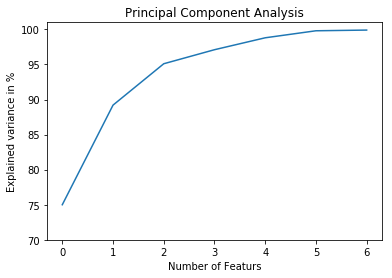

In [47]:
# Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(new_df_array) # Fit transform not done here
explained_variance = pca.explained_variance_ratio_

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.xlabel('Number of Featurs')
plt.ylabel('Explained variance in %')
plt.ylim(70,101)
plt.title('Principal Component Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

explained_variance.cumsum()

array([0.75017345, 0.89255173, 0.95179649])

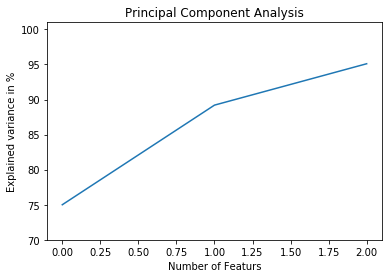

In [48]:
# Principal Component Analysis with number of components = 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
new_df_array = pca.fit_transform(new_df_array) # Fit transform done here after selecting components
explained_variance = pca.explained_variance_ratio_

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.xlabel('Number of Featurs')
plt.ylabel('Explained variance in %')
plt.ylim(70,101)
plt.title('Principal Component Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

explained_variance.cumsum()

Text(0, 0.5, 'WCSS')

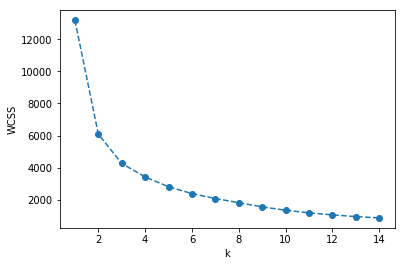

In [49]:
# Finding the optimal number of clusters
# The plot explains k vs WCSS values
# WCSS: Weighted Cluster Sum of Squares
wcss = []

for center in range(1,15):
    kmeans = KMeans(center, init='k-means++')
    model = kmeans.fit(new_df_array)
    wcss.append(model.inertia_)
    
centers = range(1,15)
plt.plot(centers, wcss, linestyle='--', marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')

In [50]:
# Using KMeans++

# Instantiating the model
kmeans_3 = KMeans(3,init='k-means++')

# Fitting the model
model_3 = kmeans_3.fit(new_df_array)

# Label_4 is the dependent variable which we created
label_3 = model_3.predict(new_df_array) # or model_4.labels_

In [51]:
# Cluster centers
model_3.cluster_centers_

array([[-3.09463877,  0.14713227, -0.225667  ],
       [ 2.46476043,  0.04150648,  0.04055239],
       [-0.25249306, -0.12365118,  0.10056646]])

Text(0.5, 0, 'column 3')

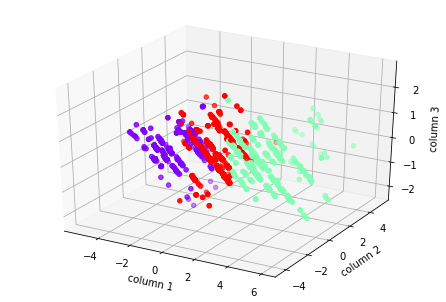

In [52]:
# Plotting the principal components using k-means clustering with k = 3
fig = plt.figure();
ax = Axes3D(fig)
ax.scatter(new_df_array[:, 0], new_df_array[:, 1], new_df_array[:, 2], c=label_3, cmap='rainbow',);
ax.set_xlabel('column 1')
ax.set_ylabel('column 2')
ax.set_zlabel('column 3')

In [54]:
# K Means clustering with k = 2
kmeans_2 = KMeans(2)
model_2 = kmeans_2.fit(new_df_array)
# Label_4 is the dependent variable which we created
label_2 = model_2.predict(new_df_array) # or model_4.labels_

Text(0.5, 0, 'column 3')

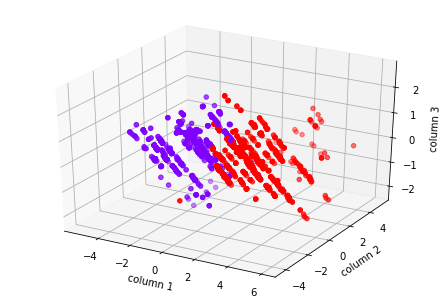

In [55]:
# Plotting the principal components using k-means clustering with k = 2
fig = plt.figure();
ax = Axes3D(fig)
ax.scatter(new_df_array[:, 0], new_df_array[:, 1], new_df_array[:, 2], c=label_2, cmap='rainbow');
ax.set_xlabel('column 1')
ax.set_ylabel('column 2')
ax.set_zlabel('column 3')

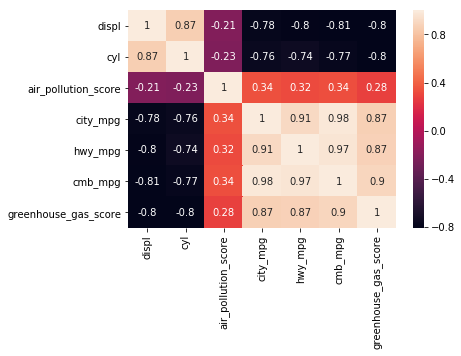

In [120]:
# Plot a heatmap for the new dataframe
sns.heatmap(new_df.corr(),annot=True)

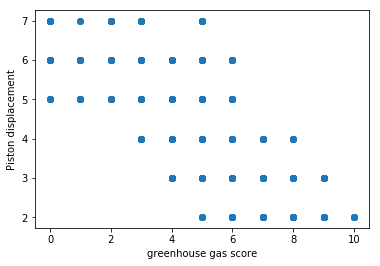

In [354]:
# Scatterplot to visualize relationship between Greenhouse Gas Score and Piston Displacement
plt.scatter(new_df['greenhouse_gas_score'],new_df['displ']);
plt.xlabel('greenhouse gas score');
plt.ylabel('Piston displacement');

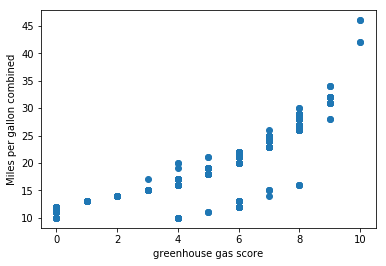

In [355]:
# Scatterplot to visualize relationship between Greenhouse Gas Score and Combined Miles per Gallon
plt.scatter(new_df['greenhouse_gas_score'],new_df['cmb_mpg']);
plt.xlabel('greenhouse gas score');
plt.ylabel('Miles per gallon combined');

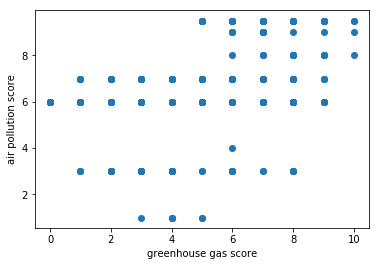

In [356]:
# Scatterplot to visualize relationship between Greenhouse Gas Score and Air pollution score
plt.scatter(new_df['greenhouse_gas_score'],new_df['air_pollution_score']);
plt.xlabel('greenhouse gas score');
plt.ylabel('air pollution score');

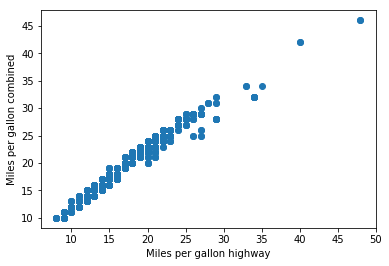

In [359]:
# Scatterplot to visualize relationship between Hisghway Miles per Gallon and Combined Miles per Gallon
plt.scatter(new_df['city_mpg'],new_df['cmb_mpg']);
plt.xlabel('Miles per gallon highway');
plt.ylabel('Miles per gallon combined');

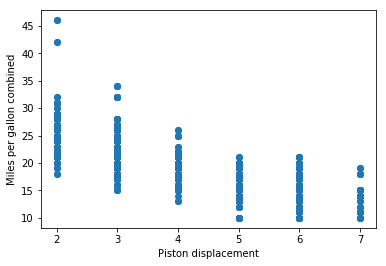

In [360]:
# Scatterplot to visualize relationship between Piston displacement and Combined Miles per Gallon
plt.scatter(new_df['displ'],new_df['cmb_mpg']);
plt.xlabel('Piston displacement');
plt.ylabel('Miles per gallon combined');

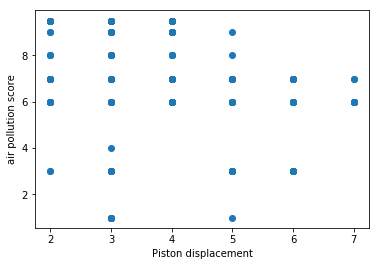

In [361]:
# Scatterplot to visualize relationship between Piston Displacement and Air Pollution Score
plt.scatter(new_df['displ'],new_df['air_pollution_score']);
plt.xlabel('Piston displacement');
plt.ylabel('air pollution score');